In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from google.colab import drive

drive.mount('/content/drive')
BasicArchitectures_dir = "/content/drive/MyDrive/BasicArchitectures"

Mounted at /content/drive


In [4]:
def f(x):
  epsilon = 1e-6
  x_modified = np.where(x == 0, x + epsilon, x)
  return np.sin(np.cos(x)) + np.cos(((((np.sin(x_modified**2))/(x_modified)) * np.cos(x-2))/(2))) * np.sin(((x)/(2))) * np.cos(x)

x_range = np.linspace(-8, 2, 10000)
y_true = f(x_range)

def mean_relative_error(y_true, y_pred):
  return np.mean(np.abs(y_true - y_pred) / y_true)

def train_and_test(model, x_range, y_true, epochs, learning_rate, model_name):
  x_train = x_range
  y_train = f(x_train)
  model.compile(loss='mse', optimizer='adam')
  history = model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1), epochs=epochs, verbose=0)

  y_pred = model.predict(x_range.reshape(-1, 1))

  error = mean_relative_error(y_true, y_pred)
  print(f'Середня відносна помилка: {error:.4f}')

  plt.plot(x_range, y_true, label='Фактичні дані')
  plt.plot(x_range, y_pred, label='Прогноз')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Модель {model_name}')
  plt.legend()
  plt.show()

  return error

---- Feedforward backpropagation ----
313/313 [==============================] - 0s 1ms/step
Середня відносна помилка: -4.4749


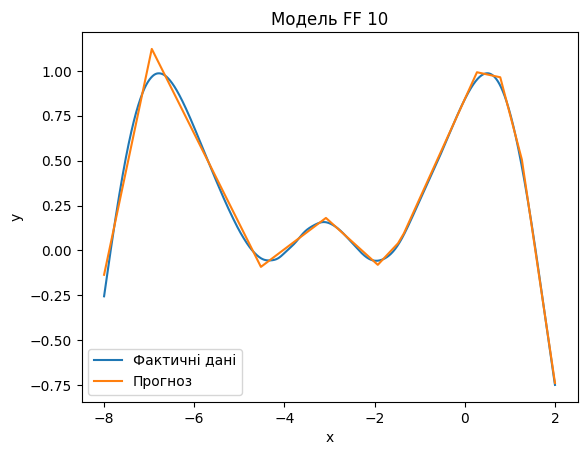

313/313 [==============================] - 0s 1ms/step
Середня відносна помилка: -4.4500


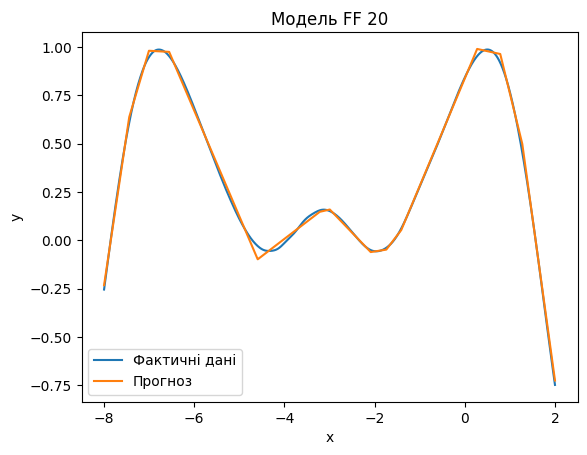

---- Cascade-forward backpropagation ----
313/313 [==============================] - 0s 1ms/step
Середня відносна помилка: -4.3999


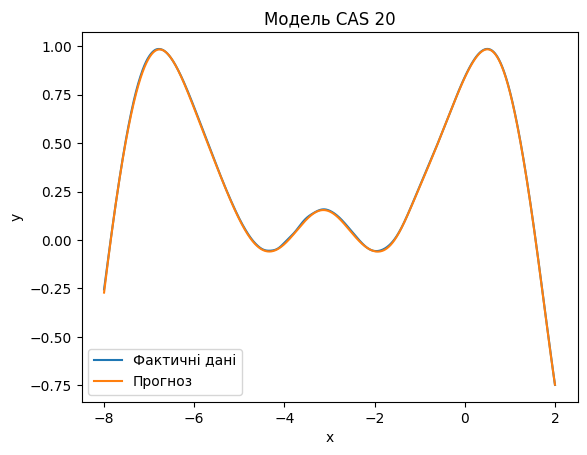

313/313 [==============================] - 0s 1ms/step
Середня відносна помилка: -4.4230


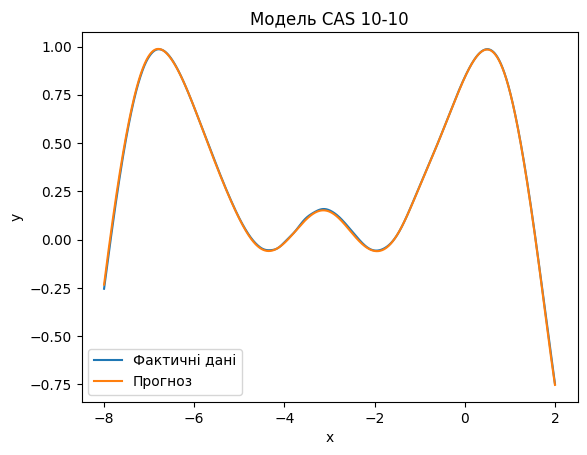

---- Elman backpropagation ----
313/313 [==============================] - 1s 1ms/step
Середня відносна помилка: -4.3925


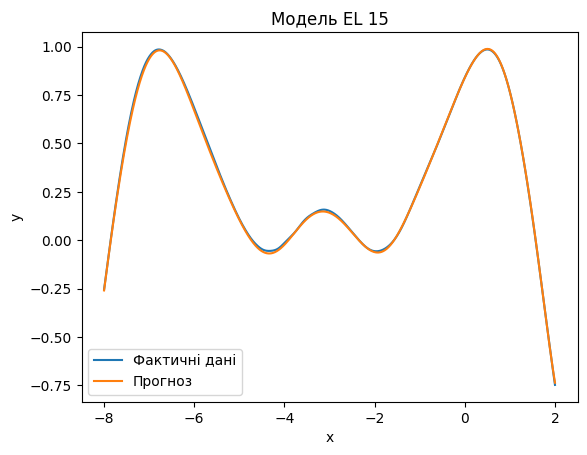

313/313 [==============================] - 1s 2ms/step
Середня відносна помилка: -4.4404


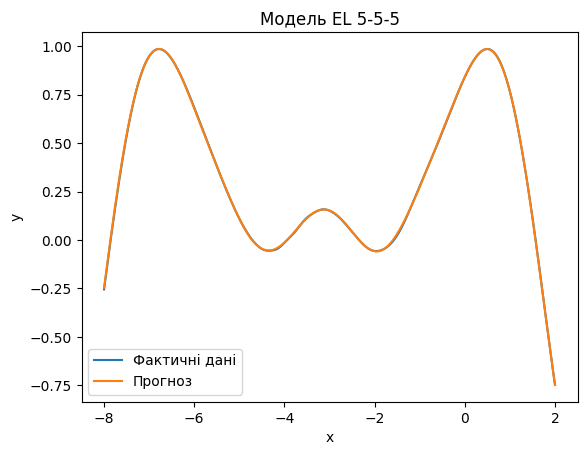

In [6]:
print("---- Feedforward backpropagation ----")

model_ff_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
  tf.keras.layers.Dense(1)

])
error_ff_10 = train_and_test(model_ff_10, x_range, y_true, epochs=1000, learning_rate=0.1, model_name="FF 10")
model_ff_10.save(BasicArchitectures_dir+"/model_ff_10.keras")

model_ff_20 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation='relu', input_shape=(1,)),
  tf.keras.layers.Dense(1)
])
error_ff_20 = train_and_test(model_ff_20, x_range, y_true, epochs=1000, learning_rate=0.1, model_name="FF 20")
model_ff_20.save(BasicArchitectures_dir+"/model_ff_20.keras")

print("---- Cascade-forward backpropagation ----")

input_layer = tf.keras.layers.Input(1)
concatenated_layers = input_layer
hidden_layer = tf.keras.layers.Dense(20, activation='tanh')(concatenated_layers)
concatenated_layers = tf.keras.layers.Concatenate(axis=-1)([concatenated_layers, hidden_layer])
output_layer = tf.keras.layers.Dense(1)(concatenated_layers)
model_cas_20 = tf.keras.models.Model(input_layer, output_layer)

error_cas_20 = train_and_test(model_cas_20, x_range, y_true, epochs=1000, learning_rate=0.1, model_name="CAS 20")
model_cas_20.save(BasicArchitectures_dir+"/model_cas_20.keras")

input_layer = tf.keras.layers.Input(1)
concatenated_layers = input_layer
hidden_layer = tf.keras.layers.Dense(10, activation='tanh')(concatenated_layers)
concatenated_layers = tf.keras.layers.Concatenate(axis=-1)([concatenated_layers, hidden_layer])
hidden_layer = tf.keras.layers.Dense(10, activation='tanh')(concatenated_layers)
concatenated_layers = tf.keras.layers.Concatenate(axis=-1)([concatenated_layers, hidden_layer])
output_layer = tf.keras.layers.Dense(1)(concatenated_layers)
model_cas_10_10 = tf.keras.models.Model(input_layer, output_layer)

error_cas_10_10 = train_and_test(model_cas_10_10, x_range, y_true, epochs=1000, learning_rate=0.1, model_name="CAS 10-10")
model_cas_10_10.save(BasicArchitectures_dir+"/model_cas_10_10.keras")

print("---- Elman backpropagation ----")

input_layer = tf.keras.layers.Input(1)
current_layer = tf.expand_dims(input_layer, axis=1)
current_layer = tf.keras.layers.SimpleRNN(15)(current_layer)
output_layer = tf.keras.layers.Dense(1)(current_layer)
model_el_15 = tf.keras.models.Model(input_layer, output_layer)

error_el_15 = train_and_test(model_el_15, x_range, y_true, epochs=1000, learning_rate=0.1, model_name="EL 15")
model_el_15.save(BasicArchitectures_dir+"/model_el_15.keras")

input_layer = tf.keras.layers.Input(1)
current_layer = tf.expand_dims(input_layer, axis=1)
current_layer = tf.keras.layers.SimpleRNN(5)(current_layer)
for neuron_number in [5, 5]:
    current_layer = tf.expand_dims(current_layer, axis=1)
    current_layer = tf.keras.layers.SimpleRNN(neuron_number, activation='tanh')(current_layer)
output_layer = tf.keras.layers.Dense(1)(current_layer)
model_el_5_5_5 = tf.keras.models.Model(input_layer, output_layer)

error_el_5_5_5 = train_and_test(model_el_5_5_5, x_range, y_true, epochs=1000, learning_rate=0.1, model_name="EL 5-5-5")
model_el_5_5_5.save(BasicArchitectures_dir+"/model_el_5_5_5.keras")

In [7]:
table_data = [
    ["FF 10", 1, 10, error_ff_10],
    ["FF 20", 1, 20, error_ff_20],
    ["CAS 20", 1, 20, error_cas_20],
    ["CAS 10-10", 2, "10-10", error_cas_10_10],
    ["EL 15", 1, 15, error_el_15],
    ["EL 5-5-5", 3, "5-5-5", error_el_5_5_5],
]

headers = ["Модель", "Кількість шарів", "Кількість нейронів", "Середня відносна помилка"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+-----------+-------------------+----------------------+----------------------------+
| Модель    |   Кількість шарів | Кількість нейронів   |   Середня відносна помилка |
+===========+===================+======================+============================+
| FF 10     |                 1 | 10                   |                   -4.47492 |
+-----------+-------------------+----------------------+----------------------------+
| FF 20     |                 1 | 20                   |                   -4.44997 |
+-----------+-------------------+----------------------+----------------------------+
| CAS 20    |                 1 | 20                   |                   -4.39993 |
+-----------+-------------------+----------------------+----------------------------+
| CAS 10-10 |                 2 | 10-10                |                   -4.42303 |
+-----------+-------------------+----------------------+----------------------------+
| EL 15     |                 1 | 15                  